# Gabriel Galvez: PSID, 2072093
# Homework 2, DSI 311


#### 0. Imports

In [64]:
### Imports used throughout the building of our model
### Machine Learning, data ananlysis tool, data description libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report 


### Step 1. set up the problem
### Extracting data into a datastructure, dataset description, & splitting into datasets

In [65]:
### load the dataset [ winequality-white.csv ]
dir_of_dataset = r"C:\Users\gabri\Downloads\winequality-white.csv"
dataset = pd.read_csv(dir_of_dataset)
dataset.dropna(inplace=True)

### Display first, & last 5 data rows from the [ dataset ]
print(dataset.head())
print(dataset.tail())

print('\n\n')
print('\n\n')
### Display the dataset's statistics
print(dataset.describe())




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

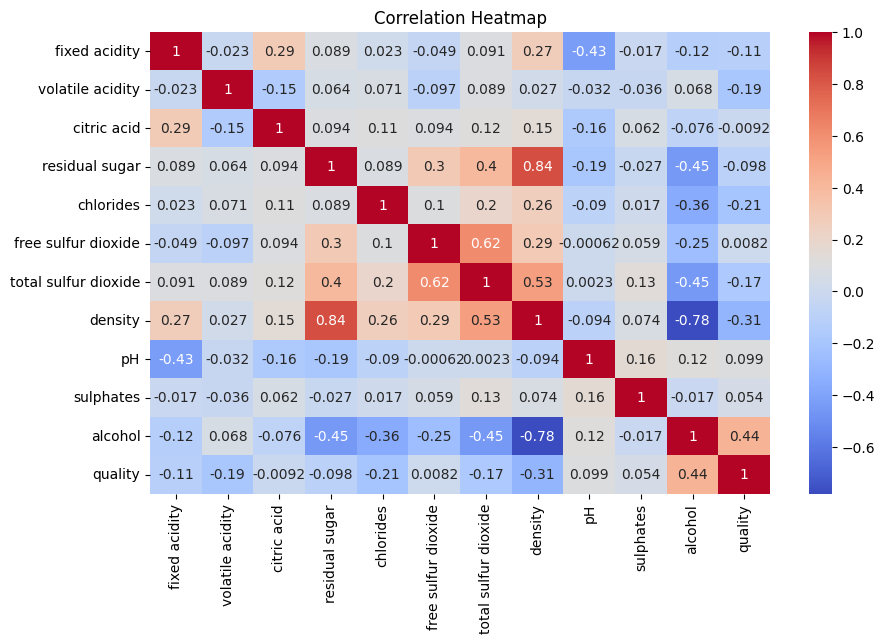

In [66]:
### Visualize the correlation of the dataset via plotting a heatmap of the statistics
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Split and structure the dataset

In [67]:
# Train split the dataset into respective values
# scaler = StandardScaler()
# scaler.fit(dataset)

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['quality'], test_size=0.2, random_state=42)
#scaler.fit(X_train)

X = X_train.drop('quality', axis=1)
y = y_train

# Step 2. Train & Compare models

In [68]:
# Decision Tree Model
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X_train, y_train, cv=5)
print(f"Decision Tree Accuracy: {tree_scores.mean()}")

# Random Forest Model
forest = RandomForestClassifier()
forest_score = cross_val_score(forest, X_train, y_train, cv=5)
print(f"Random Forest Accuracy: {forest_score.mean()}")

# Support Vector Machine Model
svm_model = SVC(kernel='poly')
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"SVM Accuracy: {svm_scores.mean()}")

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 0.9943848228946752
SVM Accuracy: 0.47575455469544137


# Step 3. Tune models based of best hyperparameters

In [69]:
# Tune Decision Tree Model
tree_params = {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid.fit(X_train, y_train) 
print(f'Best DT Params: {tree_grid.best_params_}')  
print("Score:", tree_grid.best_score_)

# Tune Random Forest Model
forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],     
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
forest_grid = GridSearchCV(RandomForestClassifier(), forest_params, cv=5) 
forest_grid.fit(X_train, y_train)
print(f'Best RF Params: {forest_grid.best_params_}')  
print("Score:", forest_grid.best_score_)





Best DT Params: {'criterion': 'gini', 'max_depth': 5}
Score: 1.0
Best RF Params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}
Score: 0.9925981312065056


# Step 4. Use make_pipeline() method to enhance SVM


In [70]:
# Make the pipeline and structure model, finally display the best parameters 
svm_pipeline = make_pipeline(StandardScaler(), PCA(n_components=8), SVC()) 
svm_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf', 'poly']} 
svm_p_grid = GridSearchCV(svm_pipeline, svm_params, cv=5)
svm_p_grid.fit(X_train, y_train)
print(f'Best SVM Params: {svm_p_grid.best_params_}') 
print(f'Score: {svm_p_grid.best_score_}')

Best SVM Params: {'svc__C': 10, 'svc__kernel': 'rbf'}
Score: 0.9530358120259598


# Step 5. Train the Dummy Classifier and compare performance

In [71]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Model Selection
best_model = tree_grid.best_estimator_

y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       291
           6       1.00      1.00      1.00       432
           7       1.00      1.00      1.00       192
           8       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



# Step 6. Final test based on random dataset row

In [107]:
### Find random data test rows to validate the models performance 
import random
random_index = random.randint(0, len(dataset) - 1)
random_row = dataset.iloc[random_index]


# Chosen data
features = random_row
true_label = random_row

#
prediction = best_model.predict(features.values.reshape(1,-1))
print("True Quality Data", true_label['quality'])
print("Model's Prediction", prediction[0])


True Quality Data 7.0
Model's Prediction 7


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### In conclusion, I found through my experiment that, SVM was actually not the highest performer out of the 3 models.

#### Out of the tree, forest, and SVM classifier, the tree and forest models seemed to comparate relatively similiar in terms of performance. With the tree model being the most accurate, and my personal model choice. 

#### While all 3 models seemed to be highly accurate after tuning the hyperparameters, the tree model was the only one to reach a score of 1 or 100% 

#### I now further understand the importance of model testing, as not every model will perform in the same or similar manner.
#### Hypertuning is also very important in recursing through multiple model hyperparameters that are used to benchmark model performance, thus no hyperparameters will result in diverse datasets being poorly predicted.

#### After choosing the best model, I tested it with random indecies form the dataset for benchmark, and so far out of 20 re-compilations the model has proven to be 20/20 times accurate in predicting the quality measurement based off its attributes

